In [1]:
import G5NR_utils
import xarray as xr
import holoviews as hv
from holoviews import streams


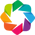

In [2]:
hv.notebook_extension('bokeh')

In [3]:
da=xr.open_dataset('../../G5NR/SKEdot_merged_90x45_flip.nc')

In [4]:
SKEDOT_ANN=da.SKEDOT.mean(dim='time')
SKEDOT_seas=da.groupby('time.season').mean(dim='time')

In [11]:
SKEDOT_ANN.to_geoimage(hover=True).redim.range(SKEDOT=(-1,1)) #hover=True make it hoverable

:Overlay
   .Image.I     :Image   [lon,lat]   (SKEDOT)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Points.I    :Points   [lon,lat]   (SKEDOT)

In [12]:
skedot_img=SKEDOT_ANN.to_geoimage(hover=True).redim.range(SKEDOT=(-1,1))

In [13]:
def skedot_ts(x,y):
    if x>1000:
        #to fix geoviews latlon formatters
        lat=y/100000
        lon=x/100000
    else:
        lat=y
        lon=x
    SKEDOT=da.SKEDOT.sel(lat=lat,lon=lon,method='nearest')
    skedot_curve=hv.Curve(hv.Dataset(SKEDOT),kdims=['time'],group='SKEDOT',label="Lon "+format(lon,"0.1f")+" Lat "+format(lat,"0.1f"))
    return skedot_curve(plot={'width':600,'tools':['hover']})

In [14]:
skedot_ts(10,10)

:Curve   [time]   (SKEDOT)

In [15]:
tap=streams.SingleTap(source=skedot_img,x=0,y=10)
skedot_ts_plot=hv.DynamicMap(skedot_ts,kdims=[],streams=[tap])
(skedot_img+skedot_ts_plot).cols(1)

:Layout
   .Overlay.I    :Overlay
      .Image.I     :Image   [lon,lat]   (SKEDOT)
      .Coastline.I :Feature   [Longitude,Latitude]
      .Points.I    :Points   [lon,lat]   (SKEDOT)
   .DynamicMap.I :DynamicMap   []
      :Curve   [time]   (SKEDOT)